김남웅 20123782

github = https://github.com/namwooong/assignment03/assignment11.ipynb

예제 코드 + scipy 추가 import

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
import scipy.linalg as spla
from scipy import sparse
from skimage.transform import resize




Dx와 Dy를 연산하는 함수 정의

In [97]:
def make_dx(shape):
    
    dx = np.zeros(((shape[0]-1) * shape[1], shape[0] * shape[1]))
    
    for i in range(shape[1]):
        for j in range(shape[0]-1):
            dx[i*(shape[0]-1)+j, i*shape[0]+j] = -1
            dx[i*(shape[0]-1)+j, i*shape[0]+j+1] = 1
    
    return sparse.csr_matrix(dx)


def make_dy(shape):
    
    dy = np.zeros((shape[0] * (shape[1]-1), shape[0] * shape[1]))
    
    for i in range(shape[1] - 1):
        for j in range(shape[0]):
            dy[i*shape[0]+j, i*shape[0]+j] = -1
            dy[i*shape[0]+j, (i+1)*shape[0]+j] = 1
    
    return sparse.csr_matrix(dy)

이미지를 vector로 표현하는 함수 정의

In [98]:
def make_v(img):
    (h, w) = img.shape
    v = np.empty(h * w)
    for i in range(w):
        v[i*h:(i+1)*h] = img[:,i]
    
    return v

reconimg function 을  연산하는 함수 정의

In [99]:
def ans(lam,img):
    vec = make_v(img)
    d_y = make_dy(img.shape)
    d_x = make_dx(img.shape)
    
    
    img_len = len(vec)
    
    matrix_1 = sparse.eye(img_len)
    matrix_1 = sparse.vstack([matrix_1, np.sqrt(lam)*d_x, np.sqrt(lam)*d_y])
    
    matrix_2 = np.zeros(img_len + d_x.shape[0] + d_y.shape[0])
    matrix_2[:img_len] = vec
    
    sol, temp, temp, temp, temp, temp, temp, temp, temp, temp = sparse.linalg.lsqr(matrix_1, matrix_2)
    answer = np.empty(im.shape)
    for i in range(im.shape[1]):
        answer[:, i] = sol[im.shape[0]*i:im.shape[0]*(i+1)]
    return answer

예제 코드를 변형하여 결과 출력

또한 size를 (205,300)에서 (100,150)으로 크기를 줄였는데 이유는 컴퓨터 성능 때문인지

메모리 초과가 발생함.

C:\Users\nwkim\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\nwkim\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


sigma = 0.25 lambda = 0.25


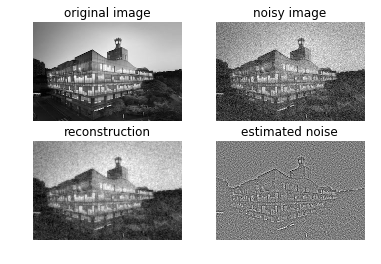

sigma = 0.25 lambda = 0.5


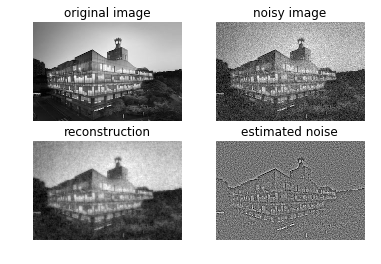

sigma = 0.25 lambda = 1


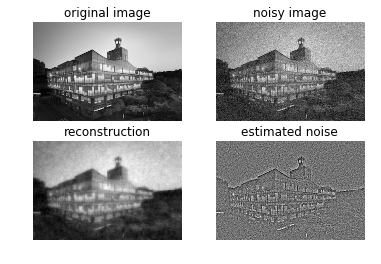

sigma = 0.5 lambda = 0.25


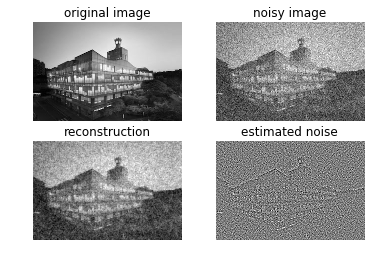

sigma = 0.5 lambda = 0.5


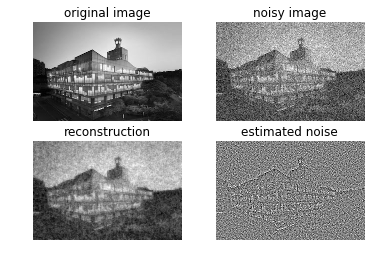

sigma = 0.5 lambda = 1


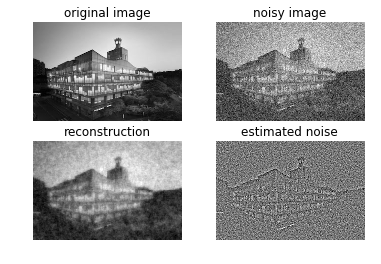

sigma = 1 lambda = 0.25


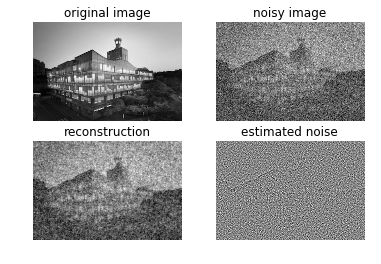

sigma = 1 lambda = 0.5


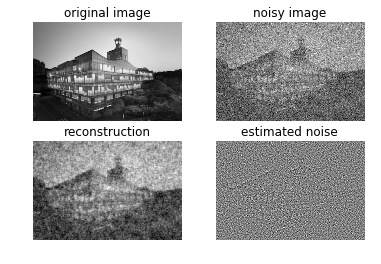

sigma = 1 lambda = 1


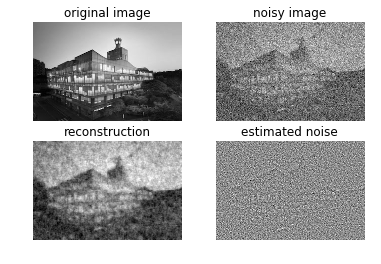

In [100]:
file_image = 'cau.jpg'

im_color = io.imread(file_image)
im_gray = color.rgb2gray(im_color)

im = (im_gray - np.mean(im_gray)) / np.std(im_gray)
im = resize(im,(100,150))
im = im[0:im.shape[0], 0:im.shape[1]]
(row, col) = im.shape


for sigma in [0.25, 0.5, 1]:
    for lam in [0.25, 0.5, 1]:
        print("sigma =", sigma, "lambda =", lam)

        noise_std = sigma # try with varying noise standard deviation
        noise = np.random.normal(0, noise_std, (row, col))
        im_noise = im + noise

        im_recon = ans(lam, im_noise)
        noise_recon = im_noise - im_recon
        error = np.linalg.norm(im - im_recon)

        p1 = plt.subplot(2,2,1)
        p1.set_title('original image')
        plt.imshow(im, cmap='gray')
        plt.axis('off')

        p2 = plt.subplot(2,2,2)
        p2.set_title('noisy image')
        plt.imshow(im_noise, cmap='gray')
        plt.axis('off')

        p3 = plt.subplot(2,2,3)
        p3.set_title('reconstruction')
        plt.imshow(im_recon, cmap='gray')
        plt.axis('off')

        p4 = plt.subplot(2,2,4)
        p4.set_title('estimated noise')
        plt.imshow(noise_recon, cmap='gray')
        plt.axis('off')

        plt.show()
       
        